# Logistics Regression with One Predictor Variable and One Response Variable
## CPE 490 590 Spring 2024
### Author: Rahul Bhadani

Logistics regression establishes the numerical relationship between two variables (predictor and response). The response is assumed to be binary (either 0 or 1, or -1 and 1)

### Note: It is actually a supervised classification problem.

## Assumptions about Logistics Regression
1. Linearity: Logistics regression fits a logistics curve to a binary data. The cuve can be interpreted as the probability associated with each outcome across independent variable values. Logistics regression assume that the relationship between natural log of these probabilities (when expressed as odds) and your predictor variable is linear.
2. No Outliers: Logistics regression is very sensisitve to outliers.
3. Independence: Each observation point should be independent of each other.

Examples of binary data include: True/False, Yes/No, Diseased/Healthy, High Risk/Low Risk

# Let's read the datset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15
from sklearn.model_selection import train_test_split


In [7]:
import pandas as pd
# load dataset
Iris = pd.read_csv("Dataset/Iris/iris.data")
Iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this case, we want to predict whether patient has diabetes or not

# Split the dataset into training and test

In [10]:
x = Iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].to_numpy()
y = Iris[['Class']].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)


# Logistics Regression Model Development and Prediction

In [11]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [12]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## Model Evaluation using Confusion Matrix


### Accuracy
Note that the example in this notebook is a very rudimentary example without the data being split into the training and test sets. So for an accuracy score, we just pass the original dataset. However, in practice, we need to split the data into the training and test sets and only use the test set for making assessment.

In [13]:
logreg.score(X_test,y_test)

0.9210526315789473

## Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.




In [14]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 14,  1],
       [ 0,  2,  8]])

# Visualizing Confusion Matrix using Heatmap


Text(0.5, 427.9555555555555, 'Predicted label')

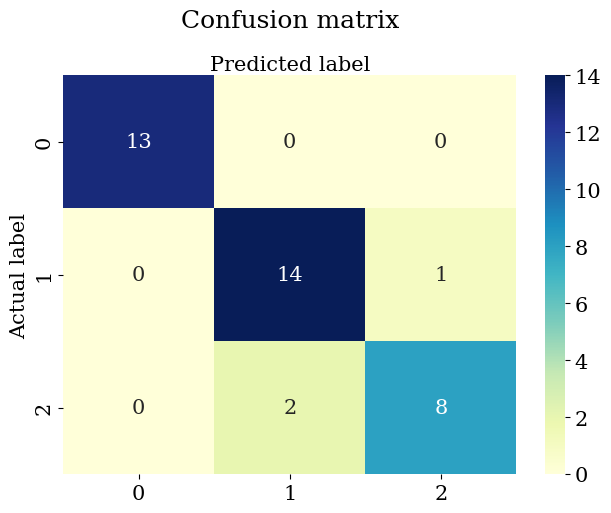

In [15]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Precision, Recall, F-measure, Support

Let's evaluate the model using classification_report for accuracy, precision, and recall.




In [18]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.92        38
      macro avg       0.92      0.91      0.92        38
   weighted avg       0.92      0.92      0.92        38

